# Steps for implementation

Reading CSV

Data Cleaning

Features

Applying HBOS to detect outliers from the data

In [ ]:
# https://github.com/kahramankostas/Anomaly-Detection-in-Networks-Using-Machine-Learning/blob/master/05_1_machine_learning_implementation_for_attack_files%20.ipynb

In [7]:
#Importing Necessary Modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split     # import module for train test split
from pyod.models.hbos import HBOS
from pyod.utils.data import evaluate_print

from sklearn.ensemble import AdaBoostClassifier
# from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from scikitplot.metrics import plot_confusion_matrix # For plotting confusion matrices
from sklearn.metrics import classification_report # Various metrics for model performance
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split     # import module for train test split
import pickle

In [10]:
# df1=pd.read_csv("./data/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
# print(df1[' Label'].value_counts())
# DDoS      128027
# BENIGN     97718
# Name:  Label, dtype: int64

# df2=pd.read_csv("./data/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
# print(df2[' Label'].value_counts())
# PortScan    158930
# BENIGN      127537
# Name:  Label, dtype: int64

# df3=pd.read_csv("./data/Friday-WorkingHours-Morning.pcap_ISCX.csv")
# print(df3[' Label'].value_counts())
# BENIGN    189067
# Bot         1966
# Name:  Label, dtype: int64

# df4=pd.read_csv("./data/Monday-WorkingHours.pcap_ISCX.csv")
# print(df4[' Label'].value_counts())
# BENIGN    529918
# Name:  Label, dtype: int64

# df5=pd.read_csv("./data/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
# print(df5[' Label'].value_counts())
# BENIGN          288566
# Infiltration        36
# Name:  Label, dtype: int64

# df6=pd.read_csv("./data/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
# print(df6[' Label'].value_counts())
# BENIGN                        168186
# Web Attack � Brute Force        1507
# Web Attack � XSS                 652
# Web Attack � Sql Injection        21
# Name:  Label, dtype: int64

# df7=pd.read_csv("./data/Tuesday-WorkingHours.pcap_ISCX.csv")
# print(df7[' Label'].value_counts())
# BENIGN         432074
# FTP-Patator      7938
# SSH-Patator      5897
# Name:  Label, dtype: int64

# df8=pd.read_csv("./data/Wednesday-workingHours.pcap_ISCX.csv")
# print(df8[' Label'].value_counts())
# BENIGN              440031
# DoS Hulk            231073
# DoS GoldenEye        10293
# DoS slowloris         5796
# DoS Slowhttptest      5499
# Heartbleed              11
# Name:  Label, dtype: int64


In [4]:
def preprosess(df):

    #remove rows with any values that are not finite
    df = df[np.isfinite(df).all(1)]
    
    df=df.dropna( axis=0, how='any')
    df=df.replace(',,', np.nan, inplace=False)
    df=df.drop(columns=[' Fwd Header Length.1'], axis=1, inplace=False)

    df.replace("Infinity", 0, inplace=True)
    df['Flow Bytes/s'].replace("Infinity", 0,inplace=True)
    df[" Flow Packets/s"].replace("Infinity", 0, inplace=True)
    df[" Flow Packets/s"].replace(np.nan, 0, inplace=True)
    df['Flow Bytes/s'].replace(np.nan, 0,inplace=True)
    df["Bwd Avg Bulk Rate"].replace("Infinity", 0, inplace=True)
    df["Bwd Avg Bulk Rate"].replace(",,", 0, inplace=True)
    df["Bwd Avg Bulk Rate"].replace(np.nan, 0, inplace=True)
    df[" Bwd Avg Packets/Bulk"].replace("Infinity", 0, inplace=True)
    df[" Bwd Avg Packets/Bulk"].replace(",,", 0, inplace=True)
    df[" Bwd Avg Packets/Bulk"].replace(np.nan, 0, inplace=True)
    df[" Bwd Avg Bytes/Bulk"].replace("Infinity", 0, inplace=True)
    df[" Bwd Avg Bytes/Bulk"].replace(",,", 0, inplace=True)
    df[" Bwd Avg Bytes/Bulk"].replace(np.nan, 0, inplace=True)
    df[" Fwd Avg Bulk Rate"].replace("Infinity", 0, inplace=True)
    df[" Fwd Avg Bulk Rate"].replace(",,", 0, inplace=True)
    df[" Fwd Avg Bulk Rate"].replace(np.nan, 0, inplace=True)
    df[" Fwd Avg Packets/Bulk"].replace("Infinity", 0, inplace=True)
    df[" Fwd Avg Packets/Bulk"].replace(",,", 0, inplace=True)
    df[" Fwd Avg Packets/Bulk"].replace(np.nan, 0, inplace=True)
    df["Fwd Avg Bytes/Bulk"].replace("Infinity", 0, inplace=True)
    df["Fwd Avg Bytes/Bulk"].replace(",,", 0, inplace=True)
    df["Fwd Avg Bytes/Bulk"].replace(np.nan, 0, inplace=True)
    df[" CWE Flag Count"].replace("Infinity", 0, inplace=True)
    df[" CWE Flag Count"].replace(",,", 0, inplace=True)
    df[" CWE Flag Count"].replace(np.nan, 0, inplace=True)
    df[" Bwd URG Flags"].replace("Infinity", 0, inplace=True)
    df[" Bwd URG Flags"].replace(",,", 0, inplace=True)
    df[" Bwd URG Flags"].replace(np.nan, 0, inplace=True)
    df[" Bwd PSH Flags"].replace("Infinity", 0, inplace=True)
    df[" Bwd PSH Flags"].replace(",,", 0, inplace=True)
    df[" Bwd PSH Flags"].replace(np.nan, 0, inplace=True)
    df[" Fwd URG Flags"].replace("Infinity", 0, inplace=True)
    df[" Fwd URG Flags"].replace(",,", 0, inplace=True)
    df[" Fwd URG Flags"].replace(np.nan, 0, inplace=True)

    df["Flow Bytes/s"]=df["Flow Bytes/s"].astype("float64")
    df[' Flow Packets/s']=df[" Flow Packets/s"].astype("float64")
    df['Bwd Avg Bulk Rate']=df["Bwd Avg Bulk Rate"].astype("float64")
    df[' Bwd Avg Packets/Bulk']=df[" Bwd Avg Packets/Bulk"].astype("float64")
    df[' Bwd Avg Bytes/Bulk']=df[" Bwd Avg Bytes/Bulk"].astype("float64")
    df[' Fwd Avg Bulk Rate']=df[" Fwd Avg Bulk Rate"].astype("float64")
    df[' Fwd Avg Packets/Bulk']=df[" Fwd Avg Packets/Bulk"].astype("float64")
    df['Fwd Avg Bytes/Bulk']=df["Fwd Avg Bytes/Bulk"].astype("float64")
    df[' CWE Flag Count']=df[" CWE Flag Count"].astype("float64")
    df[' Bwd URG Flags']=df[" Bwd URG Flags"].astype("float64")
    df[' Bwd PSH Flags']=df[" Bwd PSH Flags"].astype("float64")
    df[' Fwd URG Flags']=df[" Fwd URG Flags"].astype("float64")
    pd.set_option('display.max_rows', df.shape[0])
    df.replace('Infinity',0.0, inplace=True)
    df.replace('NaN',0.0, inplace=True)


    # old_memory_usage = df.memory_usage().sum()
    #change the variable types for low memory usage
    #int64 to int32,,, float64 to float32
    integer = []
    f = []
    for i in df.columns[:-1]:
        if df[i].dtype == "int64": integer.append(i)
        else : f.append(i)

    df[integer] = df[integer].astype("int32")
    df[f] = df[f].astype("float32")

    # df = df.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)


    # print("============================")
    # print(df.info())
    return df


DDoS      128027
BENIGN     97718
Name:  Label, dtype: int64
1    128025
0     97686
Name:  Label, dtype: int64
-----------------------
0    97686
1    97686
Name:  Label, dtype: int64
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19516
           1       1.00      1.00      1.00     19559

    accuracy                           1.00     39075
   macro avg       1.00      1.00      1.00     39075
weighted avg       1.00      1.00      1.00     39075
 



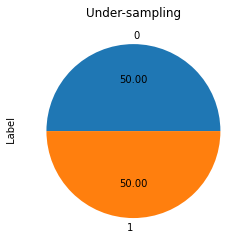

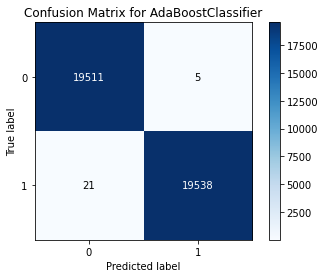

In [27]:

df1=pd.read_csv("./data/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
print(df1[' Label'].value_counts())
# DDoS      128027
# BENIGN     97718


# df1[" Label"] = df1[" Label"].replace(["FTP-Patator","SSH-Patator"],"Patator")

df1[' Label'] = df1[' Label'].replace(['BENIGN'], 0)
df1[' Label'] = df1[' Label'].replace(['DDoS'], 1)

df = preprosess(df1)

features=[" Fwd Packet Length Max"," Flow IAT Std"," Fwd Packet Length Std" ,"Fwd IAT Total",' Flow Duration', " Fwd Packet Length Mean", " Total Length of Bwd Packets", "Total Length of Fwd Packets", " Flow IAT Mean", " Bwd Packet Length Mean",  " Flow IAT Max", " Bwd Packet Length Std", ' Total Fwd Packets', ' Total Backward Packets',' Label']

df = df[features].copy()

print(df[' Label'].value_counts())


X = df.drop([' Label'], axis=1)
y = df[' Label']

rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
X_res, y_res = rus.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

print("-----------------------")
print(y_res.value_counts())

X_train, X_test, y_train, y_test=train_test_split(X_res,y_res,test_size=0.2, random_state=10)

model = AdaBoostClassifier()
    
# Fitting the model is synonymous to training the model. Need to call .ravel() to get array in correct format.
model.fit(X_train, y_train.ravel())

# Using the model to predict the label/ classes, based upon X_test data only. This is the model's answers.
pred_y = model.predict(X_test)

pred_y = model.predict(X_test) # 5)
score = classification_report(y_test, pred_y) # 6)
print('Classification report: \n', score, '\n')

plot_confusion_matrix(y_test, pred_y, title='Confusion Matrix for {}'.format("AdaBoostClassifier"))

with open('DDoS_detection_AdaBoost_model.pkl', 'wb') as f:
    pickle.dump(model, f)

1    158804
0    127292
Name:  Label, dtype: int64
    Fwd Packet Length Max   Flow IAT Std   Fwd Packet Length Std  \
0                     456  104051.398438              109.864571   

   Fwd IAT Total   Flow Duration   Fwd Packet Length Mean  \
0        1266342         1266342                64.975609   

    Total Length of Bwd Packets  Total Length of Fwd Packets   Flow IAT Mean  \
0                          6954                         2664         15075.5   

    Bwd Packet Length Mean   Flow IAT Max   Bwd Packet Length Std  \
0               158.045456         948537              312.675262   

    Total Fwd Packets   Total Backward Packets  
0                  41                       44  
    Fwd Packet Length Max   Flow IAT Std   Fwd Packet Length Std  \
0                     456  104051.398438              109.864571   

   Fwd IAT Total   Flow Duration   Fwd Packet Length Mean  \
0        1266342         1266342                64.975609   

    Total Length of Bwd Packets

<AxesSubplot: title={'center': 'Confusion Matrix for AdaBoostClassifier'}, xlabel='Predicted label', ylabel='True label'>

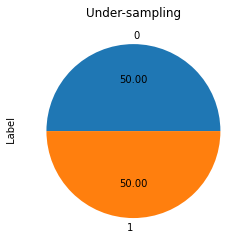

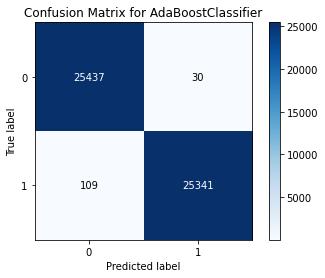

In [9]:

df2=pd.read_csv("./data/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
# print(df2[' Label'].value_counts())
# PortScan    158930
# BENIGN      127537
# Name:  Label, dtype: int64


df2[' Label'] = df2[' Label'].replace(['BENIGN'], 0)
df2[' Label'] = df2[' Label'].replace(['PortScan'], 1)

df = preprosess(df2)

features=[" Fwd Packet Length Max"," Flow IAT Std"," Fwd Packet Length Std" ,"Fwd IAT Total",' Flow Duration', " Fwd Packet Length Mean", " Total Length of Bwd Packets", "Total Length of Fwd Packets", " Flow IAT Mean", " Bwd Packet Length Mean",  " Flow IAT Max", " Bwd Packet Length Std", ' Total Fwd Packets', ' Total Backward Packets',' Label']

df = df[features].copy()

print(df[' Label'].value_counts())


X = df.drop([' Label'], axis=1)
y = df[' Label']

print(X.head(1))
rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
X_res, y_res = rus.fit_resample(X, y)
print("======================================")
print(X_res.head(1))
ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")
print("-----------------------")
print(y_res.value_counts())

X_train, X_test, y_train, y_test=train_test_split(X_res,y_res,test_size=0.2, random_state=10)

model = AdaBoostClassifier()
    
# Fitting the model is synonymous to training the model. Need to call .ravel() to get array in correct format.
model.fit(X_train, y_train.ravel())

# Using the model to predict the label/ classes, based upon X_test data only. This is the model's answers.
pred_y = model.predict(X_test)

pred_y = model.predict(X_test) # 5)
score = classification_report(y_test, pred_y) # 6)
print('Classification report: \n', score, '\n')

plot_confusion_matrix(y_test, pred_y, title='Confusion Matrix for {}'.format("AdaBoostClassifier"))

# with open('PortScan_detection_AdaBoost_model.pkl', 'wb') as f:
#     pickle.dump(model, f)



0    188955
1      1956
Name:  Label, dtype: int64
0    1956
1    1956
Name:  Label, dtype: int64
Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       397
           1       0.98      0.99      0.99       386

    accuracy                           0.99       783
   macro avg       0.99      0.99      0.99       783
weighted avg       0.99      0.99      0.99       783
 



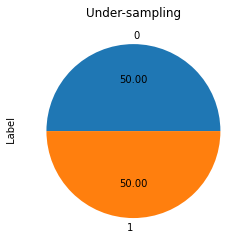

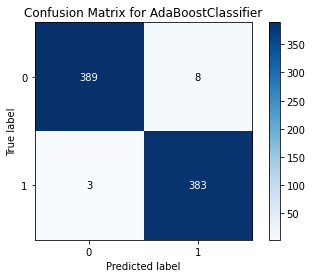

In [29]:

df3=pd.read_csv("./data/Friday-WorkingHours-Morning.pcap_ISCX.csv")
# print(df3[' Label'].value_counts())
# BENIGN    189067
# Bot         1966
# Name:  Label, dtype: int64


# df1[" Label"] = df1[" Label"].replace(["FTP-Patator","SSH-Patator"],"Patator")

df3[' Label'] = df3[' Label'].replace(['BENIGN'], 0)
df3[' Label'] = df3[' Label'].replace(['Bot'], 1)

df = preprosess(df3)

features=[" Fwd Packet Length Max"," Flow IAT Std"," Fwd Packet Length Std" ,"Fwd IAT Total",' Flow Duration', " Fwd Packet Length Mean", " Total Length of Bwd Packets", "Total Length of Fwd Packets", " Flow IAT Mean", " Bwd Packet Length Mean",  " Flow IAT Max", " Bwd Packet Length Std", ' Total Fwd Packets', ' Total Backward Packets',' Label']

df = df[features].copy()

print(df[' Label'].value_counts())


X = df.drop([' Label'], axis=1)
y = df[' Label']

rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
X_res, y_res = rus.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

print("-----------------------")
print(y_res.value_counts())

X_train, X_test, y_train, y_test=train_test_split(X_res,y_res,test_size=0.2, random_state=10)

model = AdaBoostClassifier()
    
# Fitting the model is synonymous to training the model. Need to call .ravel() to get array in correct format.
model.fit(X_train, y_train.ravel())

# Using the model to predict the label/ classes, based upon X_test data only. This is the model's answers.
pred_y = model.predict(X_test)

pred_y = model.predict(X_test) # 5)
score = classification_report(y_test, pred_y) # 6)
print('Classification report: \n', score, '\n')

plot_confusion_matrix(y_test, pred_y, title='Confusion Matrix for {}'.format("AdaBoostClassifier"))

with open('Bot_detection_AdaBoost_model.pkl', 'wb') as f:
    pickle.dump(model, f)



0    168051
1      2180
Name:  Label, dtype: int64
-----------------------
0    2180
1    2180
Name:  Label, dtype: int64
Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.95      0.97       452
           1       0.95      1.00      0.97       420

    accuracy                           0.97       872
   macro avg       0.97      0.97      0.97       872
weighted avg       0.97      0.97      0.97       872
 



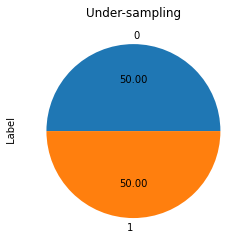

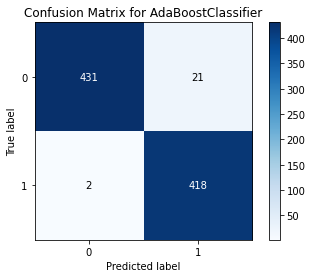

In [54]:
df6=pd.read_csv("./data/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
# print(df6[' Label'].value_counts())
# BENIGN                        168186
# Web Attack � Brute Force        1507
# Web Attack � XSS                 652
# Web Attack � Sql Injection        21
# Name:  Label, dtype: int64


df6[" Label"] = df6[" Label"].replace(["Web Attack � Brute Force","Web Attack � XSS","Web Attack � Sql Injection"],"Web Attack")

df6[' Label'] = df6[' Label'].replace(['BENIGN'], 0)
df6[' Label'] = df6[' Label'].replace(['Web Attack'], 1)

df = preprosess(df6)

features=[" Fwd Packet Length Max"," Flow IAT Std"," Fwd Packet Length Std" ,"Fwd IAT Total",' Flow Duration', " Fwd Packet Length Mean", " Total Length of Bwd Packets", "Total Length of Fwd Packets", " Flow IAT Mean", " Bwd Packet Length Mean",  " Flow IAT Max", " Bwd Packet Length Std", ' Total Fwd Packets', ' Total Backward Packets',' Label']

df = df[features].copy()

print(df[' Label'].value_counts())


X = df.drop([' Label'], axis=1)
y = df[' Label']

rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
X_res, y_res = rus.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

print("-----------------------")
print(y_res.value_counts())

X_train, X_test, y_train, y_test=train_test_split(X_res,y_res,test_size=0.2, random_state=10)

model = AdaBoostClassifier()
    
# Fitting the model is synonymous to training the model. Need to call .ravel() to get array in correct format.
model.fit(X_train, y_train.ravel())

# Using the model to predict the label/ classes, based upon X_test data only. This is the model's answers.
pred_y = model.predict(X_test)

pred_y = model.predict(X_test) # 5)
score = classification_report(y_test, pred_y) # 6)
print('Classification report: \n', score, '\n')

plot_confusion_matrix(y_test, pred_y, title='Confusion Matrix for {}'.format("AdaBoostClassifier"))

with open('WebAttack_detection_AdaBoost_model.pkl', 'wb') as f:
    pickle.dump(model, f)



BENIGN         432074
FTP-Patator      7938
SSH-Patator      5897
Name:  Label, dtype: int64
0    432074
1     13835
Name:  Label, dtype: int64
0    431813
1     13832
Name:  Label, dtype: int64
-----------------------
0    13832
1    13832
Name:  Label, dtype: int64
Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.93      0.96      2758
           1       0.93      0.99      0.96      2775

    accuracy                           0.96      5533
   macro avg       0.96      0.96      0.96      5533
weighted avg       0.96      0.96      0.96      5533
 



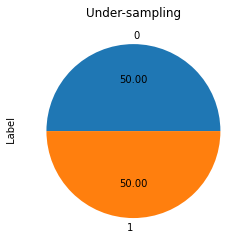

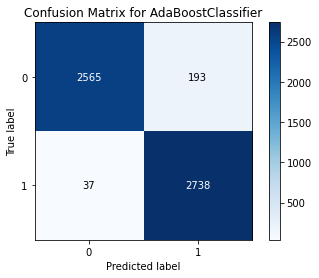

In [47]:
del df

df7=pd.read_csv("./data/Tuesday-WorkingHours.pcap_ISCX.csv")
print(df7[' Label'].value_counts())
# BENIGN         432074
# FTP-Patator      7938
# SSH-Patator      5897
# Name:  Label, dtype: int64


df7[" Label"] = df7[" Label"].replace(["FTP-Patator","SSH-Patator"],"Patator")

df7[' Label'] = df7[' Label'].replace(['BENIGN'], 0)
df7[' Label'] = df7[' Label'].replace(['Patator'], 1)

df = preprosess(df7)
# print(df.info())
print(df7[' Label'].value_counts())
features=[" Fwd Packet Length Max"," Flow IAT Std"," Fwd Packet Length Std" ,"Fwd IAT Total",' Flow Duration', " Fwd Packet Length Mean", " Total Length of Bwd Packets", "Total Length of Fwd Packets", " Flow IAT Mean", " Bwd Packet Length Mean",  " Flow IAT Max", " Bwd Packet Length Std", ' Total Fwd Packets', ' Total Backward Packets',' Label']

df = df[features].copy()

print(df[' Label'].value_counts())


X = df.drop([' Label'], axis=1)
y = df[' Label']

rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
X_res, y_res = rus.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

print("-----------------------")
print(y_res.value_counts())

X_train, X_test, y_train, y_test=train_test_split(X_res,y_res,test_size=0.2, random_state=10)

model = AdaBoostClassifier()
    
# Fitting the model is synonymous to training the model. Need to call .ravel() to get array in correct format.
model.fit(X_train, y_train.ravel())

# Using the model to predict the label/ classes, based upon X_test data only. This is the model's answers.
pred_y = model.predict(X_test)

pred_y = model.predict(X_test) # 5)
score = classification_report(y_test, pred_y) # 6)
print('Classification report: \n', score, '\n')

plot_confusion_matrix(y_test, pred_y, title='Confusion Matrix for {}'.format("AdaBoostClassifier"))

with open('Patator_detection_AdaBoost_model.pkl', 'wb') as f:
    pickle.dump(model, f)



0    439683
1    251712
Name:  Label, dtype: int64
-----------------------
0    251712
1    251712
Name:  Label, dtype: int64
Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     25231
           1       0.99      1.00      0.99     25112

    accuracy                           0.99     50343
   macro avg       0.99      0.99      0.99     50343
weighted avg       0.99      0.99      0.99     50343
 



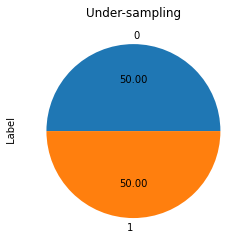

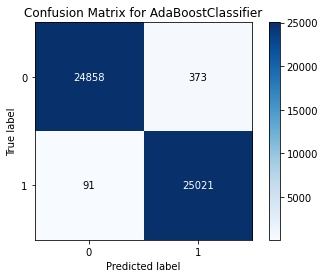

In [56]:
df8=pd.read_csv("./data/Wednesday-workingHours.pcap_ISCX.csv")
# print(df8[' Label'].value_counts())
# BENIGN              440031
# DoS Hulk            231073
# DoS GoldenEye        10293
# DoS slowloris         5796
# DoS Slowhttptest      5499
# Heartbleed              11
# Name:  Label, dtype: int64



df8[" Label"] = df8[" Label"].replace(["DoS Hulk","DoS GoldenEye","DoS slowloris","DoS Slowhttptest"],"DoS")
# remove Heartbleed attacks
df8.drop(df8.loc[df8[' Label']== "Heartbleed"].index, inplace=True)

df8[' Label'] = df8[' Label'].replace(['BENIGN'], 0)
df8[' Label'] = df8[' Label'].replace(['DoS'], 1)



df = preprosess(df8)

features=[" Fwd Packet Length Max"," Flow IAT Std"," Fwd Packet Length Std" ,"Fwd IAT Total",' Flow Duration', " Fwd Packet Length Mean", " Total Length of Bwd Packets", "Total Length of Fwd Packets", " Flow IAT Mean", " Bwd Packet Length Mean",  " Flow IAT Max", " Bwd Packet Length Std", ' Total Fwd Packets', ' Total Backward Packets',' Label']

df = df[features].copy()

print(df[' Label'].value_counts())


X = df.drop([' Label'], axis=1)
y = df[' Label']

rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
X_res, y_res = rus.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

print("-----------------------")
print(y_res.value_counts())

X_train, X_test, y_train, y_test=train_test_split(X_res,y_res,test_size=0.1, random_state=10)

model = AdaBoostClassifier()
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier(max_depth=5, n_estimators=5, max_features=3)

model = RandomForestClassifier()
# model = DecisionTreeClassifier()
    
# Fitting the model is synonymous to training the model. Need to call .ravel() to get array in correct format.
model.fit(X_train, y_train.ravel())

# Using the model to predict the label/ classes, based upon X_test data only. This is the model's answers.
pred_y = model.predict(X_test)

score = classification_report(y_test, pred_y) 
print('Classification report: \n', score, '\n')

plot_confusion_matrix(y_test, pred_y, title='Confusion Matrix for {}'.format("AdaBoostClassifier"))

with open('DoS_detection_AdaBoost_model.pkl', 'wb') as f:
    pickle.dump(model, f)



In [50]:
with open('DoS_detection_AdaBoost_model.pkl', 'rb') as f:
    clf = pickle.load(f)

# print(X_res.head(1))

first_Row = X.loc[1, :].to_numpy().tolist() # [first_Row]
# first_Row = X_res.loc[1,:].to_numpy().reshape(1,-1)
# first_Row = X_res.head(1)

print(first_Row)
from sklearn.metrics import accuracy_score

# print(type(single))
label = clf.predict([first_Row])

# accuracy_score( [y[1]], response, normalize=False)
response = clf.predict_proba([first_Row])
# print(response)
print(label,response, y[1])

# [[0.57980891 0.42019109]] 0 # [first_Row]
# [[0.57980891 0.42019109]] 0
# [[1. 0.]] 0


[79.0, 25.510408401489258, 31.449237823486328, 479.0, 479.0, 15.636363983154297, 326.0, 172.0, 31.933332443237305, 65.19999694824219, 73.0, 89.27877807617188, 11.0, 5.0]
[0] [[1. 0.]] 0


BENIGN     432074
Patator     13835
Name:  Label, dtype: int64
0    431813
1     13832
Name:  Label, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 445645 entries, 0 to 445908
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Fwd Packet Length Max        445645 non-null  int32  
 1    Flow IAT Std                 445645 non-null  float32
 2    Fwd Packet Length Std        445645 non-null  float32
 3   Fwd IAT Total                 445645 non-null  int32  
 4    Flow Duration                445645 non-null  int32  
 5    Fwd Packet Length Mean       445645 non-null  float32
 6    Total Length of Bwd Packets  445645 non-null  int32  
 7   Total Length of Fwd Packets   445645 non-null  int32  
 8    Flow IAT Mean                445645 non-null  float32
 9    Bwd Packet Length Mean       445645 non-null  float32
 10   Flow IAT Max                 445645 non-null  int

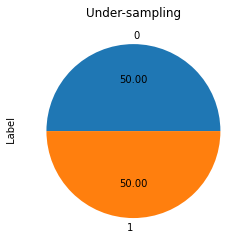

In [14]:
# from pyod.models.knn import KNN
# from pyod.models.lof import LOF
# from pyod.models.hbos import HBOS
# from pyod.models.iforest import IForest
# from pyod.models.cblof import CBLOF
# from pyod.models.loci import LOCI
# from pyod.models.sos import SOS
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler

df7 = pd.read_csv("./data//Tuesday-WorkingHours.pcap_ISCX.csv")

df7[" Label"] = df7[" Label"].replace(["FTP-Patator","SSH-Patator"],"Patator")
print(df7[' Label'].value_counts())


df7[' Label'] = df7[' Label'].replace(['BENIGN'], 0)
df7[' Label'] = df7[' Label'].replace(['Patator'], 1)

df = preprosess(df7)

features=[" Fwd Packet Length Max"," Flow IAT Std"," Fwd Packet Length Std" ,"Fwd IAT Total",' Flow Duration', " Fwd Packet Length Mean", " Total Length of Bwd Packets", "Total Length of Fwd Packets", " Flow IAT Mean", " Bwd Packet Length Mean",  " Flow IAT Max", " Bwd Packet Length Std", ' Total Fwd Packets', ' Total Backward Packets',' Label']

# print(df6.columns)
df = df[features].copy()

# print(df3[" Label"].unique())
print(df[' Label'].value_counts())
print(df.info())

X = df.drop([' Label'], axis=1)
y = df[' Label']
# X = df[df.columns[0:-1]]
# y = df[df.columns[-1]]

rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
# rus = RandomUnderSampler(sampling_strategy="not minority") # String
X_res, y_res = rus.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

# X_res.value_counts()
print(y_res.value_counts())

X_train, X_test, y_train, y_test=train_test_split(X_res,y_res,test_size=0.2, random_state=10)
# X_train, X_test, y_train, y_test=train_test_split(X_train, y_train,test_size=0.2, random_state=10)


# Initialize and train classifier model
clf = LogisticRegression(solver='lbfgs', max_iter=100).fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Compare test set predictions with ground truth labels
print(accuracy_score(y_pred, y_test))
print(confusion_matrix(y_test, y_pred))

In [17]:
# !pip install scikit-plot

Classification report: 
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      2758
           1       0.95      0.97      0.96      2775

    accuracy                           0.96      5533
   macro avg       0.96      0.96      0.96      5533
weighted avg       0.96      0.96      0.96      5533
 



<AxesSubplot: title={'center': 'Confusion Matrix for KNeighborsClassifier'}, xlabel='Predicted label', ylabel='True label'>

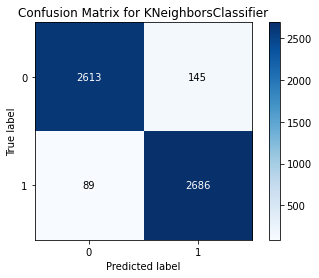

In [19]:
from scikitplot.metrics import plot_confusion_matrix # For plotting confusion matrices
from sklearn.metrics import classification_report # Various metrics for model performance
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbors ML classifier (default n. of neighbors = 5)
from sklearn.neural_network import MLPClassifier # For Neural Network classifier

model = KNeighborsClassifier(n_neighbors=5, weights='uniform',
                                    algorithm='auto', leaf_size=30,
                                    p=2, metric='minkowski',
                                    metric_params=None, n_jobs=None)

model.fit(X_train, y_train.ravel()) # 4)
pred_y = model.predict(X_test) # 5)
score = classification_report(y_test, pred_y) # 6)
print('Classification report: \n', score, '\n')

plot_confusion_matrix(y_test, pred_y, title='Confusion Matrix for {}'.format("KNeighborsClassifier"))

Classification report: 
               precision    recall  f1-score   support

           0       0.67      0.61      0.64      2758
           1       0.64      0.70      0.67      2775

    accuracy                           0.65      5533
   macro avg       0.65      0.65      0.65      5533
weighted avg       0.65      0.65      0.65      5533
 



/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  warnings.warn(


<AxesSubplot: title={'center': 'Confusion Matrix for MLPClassifier'}, xlabel='Predicted label', ylabel='True label'>

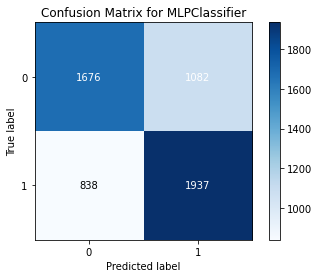

In [23]:
from sklearn.neural_network import MLPClassifier # For Neural Network classifier

model = MLPClassifier(hidden_layer_sizes=(10,), activation='relu',
                                    solver='adam', alpha=0.01, batch_size='auto',
                                    learning_rate='adaptive', learning_rate_init=0.1,
                                    max_iter=2)
    
# Fitting the model is synonymous to training the model. Need to call .ravel() to get array in correct format.
model.fit(X_train, y_train.ravel())

# Using the model to predict the label/ classes, based upon X_test data only. This is the model's answers.
pred_y = model.predict(X_test)

pred_y = model.predict(X_test) # 5)
score = classification_report(y_test, pred_y) # 6)
print('Classification report: \n', score, '\n')

plot_confusion_matrix(y_test, pred_y, title='Confusion Matrix for {}'.format("MLPClassifier"))

Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.94      0.96      2758
           1       0.94      0.99      0.96      2775

    accuracy                           0.96      5533
   macro avg       0.96      0.96      0.96      5533
weighted avg       0.96      0.96      0.96      5533
 



<AxesSubplot: title={'center': 'Confusion Matrix for AdaBoostClassifier'}, xlabel='Predicted label', ylabel='True label'>

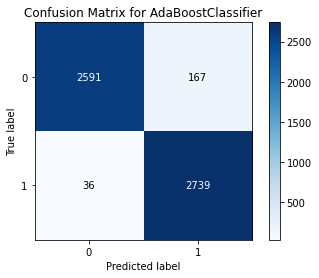

In [26]:
from sklearn.ensemble import AdaBoostClassifier


model = AdaBoostClassifier()
    
# Fitting the model is synonymous to training the model. Need to call .ravel() to get array in correct format.
model.fit(X_train, y_train.ravel())

# Using the model to predict the label/ classes, based upon X_test data only. This is the model's answers.
pred_y = model.predict(X_test)

pred_y = model.predict(X_test) # 5)
score = classification_report(y_test, pred_y) # 6)
print('Classification report: \n', score, '\n')

plot_confusion_matrix(y_test, pred_y, title='Confusion Matrix for {}'.format("AdaBoostClassifier"))

Classification report: 
               precision    recall  f1-score   support

           0       0.98      0.95      0.97      2758
           1       0.95      0.98      0.97      2775

    accuracy                           0.97      5533
   macro avg       0.97      0.97      0.97      5533
weighted avg       0.97      0.97      0.97      5533
 



<AxesSubplot: title={'center': 'Confusion Matrix for RandomForestClassifier'}, xlabel='Predicted label', ylabel='True label'>

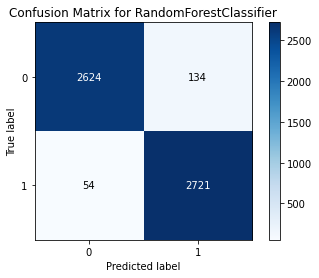

In [32]:
from sklearn.tree import DecisionTreeClassifier
model = RandomForestClassifier(max_depth=17, max_features=10, min_samples_leaf=3, n_estimators=50, random_state=42, oob_score=True)
# rfc = RandomForestClassifier(n_estimators=250, random_state=1)
model.fit(X_train, y_train)
pred_y = model.predict(X_test)

pred_y = model.predict(X_test) # 5)
score = classification_report(y_test, pred_y) # 6)
print('Classification report: \n', score, '\n')

plot_confusion_matrix(y_test, pred_y, title='Confusion Matrix for {}'.format("RandomForestClassifier"))


In [4]:
import time
import warnings
warnings.filterwarnings("ignore")

from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier


df6 = pd.read_csv("./data/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
df6[" Label"] = df6[" Label"].replace(["Web Attack � Brute Force","Web Attack � XSS","Web Attack � Sql Injection"],"Web Attack")
# print(df6[" Label"].unique())
df6[' Label'].value_counts()

df6[' Label'] = df6[' Label'].replace(['BENIGN'], 0)
df6[' Label'] = df6[' Label'].replace(['Web Attack'], 1)

df = preprosess(df6)

features=[" Fwd Packet Length Max"," Flow IAT Std"," Fwd Packet Length Std" ,"Fwd IAT Total",' Flow Duration', " Fwd Packet Length Mean", " Total Length of Bwd Packets", "Total Length of Fwd Packets", " Flow IAT Mean", " Bwd Packet Length Mean",  " Flow IAT Max", " Bwd Packet Length Std", ' Total Fwd Packets', ' Total Backward Packets',' Label']

# print(df6.columns)
df = df[features].copy()

# print(df3[" Label"].unique())
print(df[' Label'].value_counts())
print(df.info())

X = df.drop([' Label'], axis=1)
y = df[' Label']
# X = df[df.columns[0:-1]]
# y = df[df.columns[-1]]

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=10)


models = []
models.append(('KNN', KNeighborsClassifier()))
# models.append(('SVM', SVC(gamma='auto')))
models.append(('CART', DecisionTreeClassifier(max_depth=5)))
models.append(('RF', RandomForestClassifier(max_depth=5, n_estimators=5, max_features=3)))    
models.append(('ABoost', AdaBoostClassifier()))
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=200)))
models.append(('NB', GaussianNB()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('MLP', MLPClassifier()))

print('Model\tAcc\tPr\tRecall\tF1\tExecution')
      
for name, model in models:
    start_time = time.time()
    kfold = model_selection.KFold(n_splits=5, random_state=24, shuffle=True)    

    accuracy = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy').mean()
    precision = cross_val_score(model, X_train, y_train, cv=kfold, scoring='precision').mean()
    recall = cross_val_score(model, X_train, y_train, cv=kfold, scoring='recall').mean()
    f1_score = cross_val_score(model, X, y, cv=kfold, scoring='f1_weighted').mean()
    
    delta = time.time() - start_time
    print('{}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.2f} secs'.format(name, accuracy, precision, recall, f1_score, delta))

0    168051
1      2180
Name:  Label, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 170231 entries, 0 to 170365
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Fwd Packet Length Max        170231 non-null  int32  
 1    Flow IAT Std                 170231 non-null  float32
 2    Fwd Packet Length Std        170231 non-null  float32
 3   Fwd IAT Total                 170231 non-null  int32  
 4    Flow Duration                170231 non-null  int32  
 5    Fwd Packet Length Mean       170231 non-null  float32
 6    Total Length of Bwd Packets  170231 non-null  int32  
 7   Total Length of Fwd Packets   170231 non-null  int32  
 8    Flow IAT Mean                170231 non-null  float32
 9    Bwd Packet Length Mean       170231 non-null  float32
 10   Flow IAT Max                 170231 non-null  int32  
 11   Bwd Packet Length Std        170231 non-null  float3

0    2180
1    2180
Name:  Label, dtype: int64
Model	Acc	Pr	Recall	F1	Execution
KNN	0.960	0.948	0.974	0.999	7.07 secs
CART	0.968	0.963	0.977	0.995	1.93 secs
RF	0.973	0.961	0.983	0.995	1.60 secs
ABoost	0.969	0.961	0.979	0.995	26.12 secs
LR	0.729	0.690	0.894	0.981	14.75 secs
NB	0.907	0.899	0.918	0.930	0.32 secs
LDA	0.826	0.746	0.993	0.982	1.36 secs
QDA	0.876	0.811	0.984	0.847	0.65 secs
MLP	0.849	0.615	0.913	0.981	82.91 secs


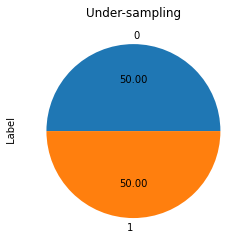

In [5]:
# import time
# import warnings
# warnings.filterwarnings("ignore")

# from sklearn import model_selection
# from sklearn.model_selection import cross_val_score
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import GaussianNB
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# from sklearn.neural_network import MLPClassifier


# df6 = pd.read_csv("./data/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
# df6[" Label"] = df6[" Label"].replace(["Web Attack � Brute Force","Web Attack � XSS","Web Attack � Sql Injection"],"Web Attack")
# # print(df6[" Label"].unique())
# df6[' Label'].value_counts()

# df6[' Label'] = df6[' Label'].replace(['BENIGN'], 0)
# df6[' Label'] = df6[' Label'].replace(['Web Attack'], 1)

# df = preprosess(df6)

# features=[" Fwd Packet Length Max"," Flow IAT Std"," Fwd Packet Length Std" ,"Fwd IAT Total",' Flow Duration', " Fwd Packet Length Mean", " Total Length of Bwd Packets", "Total Length of Fwd Packets", " Flow IAT Mean", " Bwd Packet Length Mean",  " Flow IAT Max", " Bwd Packet Length Std", ' Total Fwd Packets', ' Total Backward Packets',' Label']


# print(df[' Label'].value_counts())
# print(df.info())

# X = df.drop([' Label'], axis=1)
# y = df[' Label']
# # X = df[df.columns[0:-1]]
# # y = df[df.columns[-1]]

rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
# rus = RandomUnderSampler(sampling_strategy="not minority") # String
X_res, y_res = rus.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

# X_res.value_counts()
print(y_res.value_counts())



X_train, X_test, y_train, y_test=train_test_split(X_res,y_res,test_size=0.1, random_state=10)


models = []
models.append(('KNN', KNeighborsClassifier()))
# models.append(('SVM', SVC(gamma='auto')))
models.append(('CART', DecisionTreeClassifier(max_depth=5)))
models.append(('RF', RandomForestClassifier(max_depth=5, n_estimators=5, max_features=3)))    
models.append(('ABoost', AdaBoostClassifier()))
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=200)))
models.append(('NB', GaussianNB()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('MLP', MLPClassifier()))

print('Model\tAcc\tPr\tRecall\tF1\tExecution')
      
for name, model in models:
    start_time = time.time()
    kfold = model_selection.KFold(n_splits=5, random_state=24, shuffle=True)    

    accuracy = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy').mean()
    precision = cross_val_score(model, X_train, y_train, cv=kfold, scoring='precision').mean()
    recall = cross_val_score(model, X_train, y_train, cv=kfold, scoring='recall').mean()
    f1_score = cross_val_score(model, X, y, cv=kfold, scoring='f1_weighted').mean()
    
    delta = time.time() - start_time
    print('{}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.2f} secs'.format(name, accuracy, precision, recall, f1_score, delta))


In [46]:
import time
import warnings
warnings.filterwarnings("ignore")

from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier


df8=pd.read_csv("./data/Wednesday-workingHours.pcap_ISCX.csv")
# print(df8[' Label'].value_counts())
# BENIGN              440031
# DoS Hulk            231073
# DoS GoldenEye        10293
# DoS slowloris         5796
# DoS Slowhttptest      5499
# Heartbleed              11
# Name:  Label, dtype: int64



df8[" Label"] = df8[" Label"].replace(["DoS Hulk","DoS GoldenEye","DoS slowloris","DoS Slowhttptest"],"DoS")
# remove Heartbleed attacks
df8.drop(df8.loc[df8[' Label']== "Heartbleed"].index, inplace=True)

df8[' Label'] = df8[' Label'].replace(['BENIGN'], 0)
df8[' Label'] = df8[' Label'].replace(['DoS'], 1)

df = preprosess(df8)

features=[" Fwd Packet Length Max"," Flow IAT Std"," Fwd Packet Length Std" ,"Fwd IAT Total",' Flow Duration', " Fwd Packet Length Mean", " Total Length of Bwd Packets", "Total Length of Fwd Packets", " Flow IAT Mean", " Bwd Packet Length Mean",  " Flow IAT Max", " Bwd Packet Length Std", ' Total Fwd Packets', ' Total Backward Packets',' Label']

# print(df6.columns)
df = df[features].copy()

# print(df3[" Label"].unique())
print(df[' Label'].value_counts())
print(df.info())

X = df.drop([' Label'], axis=1)
y = df[' Label']
# X = df[df.columns[0:-1]]
# y = df[df.columns[-1]]

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=10)


models = []
models.append(('KNN', KNeighborsClassifier()))
# models.append(('SVM', SVC(gamma='auto')))
# models.append(('CART', DecisionTreeClassifier(max_depth=5)))
# models.append(('RF', RandomForestClassifier(max_depth=5, n_estimators=5, max_features=3)))    
models.append(('ABoost', AdaBoostClassifier()))
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=200)))
models.append(('NB', GaussianNB()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('MLP', MLPClassifier()))

print('Model\tAcc\tPr\tRecall\tF1\tExecution')
      
for name, model in models:
    start_time = time.time()
    kfold = model_selection.KFold(n_splits=5, random_state=24, shuffle=True)    

    accuracy = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy').mean()
    precision = cross_val_score(model, X_train, y_train, cv=kfold, scoring='precision').mean()
    recall = cross_val_score(model, X_train, y_train, cv=kfold, scoring='recall').mean()
    f1_score = cross_val_score(model, X, y, cv=kfold, scoring='f1_weighted').mean()
    
    delta = time.time() - start_time
    print('{}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.2f} secs'.format(name, accuracy, precision, recall, f1_score, delta))

0    439683
1    251712
Name:  Label, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 691395 entries, 0 to 692702
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Fwd Packet Length Max        691395 non-null  int32  
 1    Flow IAT Std                 691395 non-null  float32
 2    Fwd Packet Length Std        691395 non-null  float32
 3   Fwd IAT Total                 691395 non-null  int32  
 4    Flow Duration                691395 non-null  int32  
 5    Fwd Packet Length Mean       691395 non-null  float32
 6    Total Length of Bwd Packets  691395 non-null  int32  
 7   Total Length of Fwd Packets   691395 non-null  int32  
 8    Flow IAT Mean                691395 non-null  float32
 9    Bwd Packet Length Mean       691395 non-null  float32
 10   Flow IAT Max                 691395 non-null  int32  
 11   Bwd Packet Length Std        691395 non-null  float3

KeyboardInterrupt: 

In [29]:
# !pip install tensorflow

In [27]:
from itertools import cycle
import pickle
import sys
import time
from typing import List, Tuple

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
import sklearn.preprocessing
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import LSTM, Bidirectional, BatchNormalization, Convolution1D, MaxPooling1D, Reshape
from tensorflow.keras.models import Sequential

%matplotlib inline

batch_size = 32
model = Sequential()
model.add(Convolution1D(64, kernel_size=32, padding="same",
          activation="relu", input_shape=(76, 1)))
model.add(MaxPooling1D(pool_size=(5)))
model.add(BatchNormalization())
model.add(Bidirectional(LSTM(64, return_sequences=False)))
model.add(Reshape((128, 1), input_shape=(128, )))

model.add(MaxPooling1D(pool_size=(5)))
model.add(BatchNormalization())
model.add(Bidirectional(LSTM(128, return_sequences=False)))

model.add(Dropout(0.5))
model.add(Dense(4))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

model.summary(line_length=100)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = pd.DataFrame(columns=[1, 2, 3, 4, 5, 'Mean'],
                      index=['Accuracy', 'Precision', 'Recall', 'F1'])

2023-03-02 16:31:24.433750: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-02 16:31:24.876908: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-02 16:31:24.935812: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-02 16:31:24.935834: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

Model: "sequential"
____________________________________________________________________________________________________
 Layer (type)                                Output Shape                            Param #        
 conv1d (Conv1D)                             (None, 76, 64)                          2112           
                                                                                                    
 max_pooling1d (MaxPooling1D)                (None, 15, 64)                          0              
                                                                                                    
 batch_normalization (BatchNormalization)    (None, 15, 64)                          256            
                                                                                                    
 bidirectional (Bidirectional)               (None, 128)                             66048          
                                                                       

In [51]:
features=[" Fwd Packet Length Max"," Flow IAT Std"," Fwd Packet Length Std" ,"Fwd IAT Total",' Flow Duration', " Fwd Packet Length Mean", " Total Length of Bwd Packets", "Total Length of Fwd Packets", " Flow IAT Mean", " Bwd Packet Length Mean",  " Flow IAT Max", " Bwd Packet Length Std", ' Total Fwd Packets', ' Total Backward Packets',' Label']
features

[' Fwd Packet Length Max',
 ' Flow IAT Std',
 ' Fwd Packet Length Std',
 'Fwd IAT Total',
 ' Flow Duration',
 ' Fwd Packet Length Mean',
 ' Total Length of Bwd Packets',
 'Total Length of Fwd Packets',
 ' Flow IAT Mean',
 ' Bwd Packet Length Mean',
 ' Flow IAT Max',
 ' Bwd Packet Length Std',
 ' Total Fwd Packets',
 ' Total Backward Packets',
 ' Label']

In [52]:
# Bwd Packet Length Std 
#  PSH Flag Count 
#  min_seg_size_forward
#  Min Packet Length    
#  ACK Flag Count 
#  Bwd Packet Length Min
#  Fwd IAT Std  
# Init_Win_bytes_forward         
#  Flow IAT Max                  
#  Bwd Packets/s
#  URG Flag Count 
# Bwd IAT Total                  
#  Init_Win_bytes_backward       
#  Destination Port              
#  Idle Min   
#  Flow Duration                 
# Fwd IAT Total                  
#  Subflow Fwd Bytes             
# Total Length of Fwd Packets    
#  Fwd Packet Length Mean
#  Avg Fwd Segment Size
#  Flow IAT Mean
#  Fwd Packet Length Min
#  Bwd IAT Max
#  Fwd Packet Length Max

# https://www.kaggle.com/code/omrastogi/cicidsclassifiers